In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
import os
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import networkx as nx
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import itertools
import collections
import string
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist

In [2]:
df = pd.read_csv("Data/concatenated_data_all.csv")

C:\Users\dell\AppData\Local\Temp\ipykernel_36756\3673455418.py:1: DtypeWarning: Columns (13,37,38,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/concatenated_data_all.csv")


In [3]:
df.head()

,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )
0,2020-03-24,Floriana Jucan,iamflorianajucan,100044342683507,JOURNALIST,RO,"Viaţa mea a fost câteodată fiară, câteodată fl...",2010-03-25 10:40:42,47142.0,54517.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"99,959",98.29,NaN
1,2020-03-11,Dr. Mihail Pautov,doctormihail,340640989728926,SURGEON,RO,"Medic Specialist, Chirurgie Generala",2017-09-13 19:05:42,NaN,NaN,...,NaN,NaN,Coronavirus-vs-VitaminaC,NaN,NaN,NaN,NaN,"66,009",17.33,NaN
2,2020-03-16,Codin Maticiuc,codin.maticiuc,100050227700665,PERSON,RO,Pagina pentru ganduri. Ale mele.,2015-10-28 12:52:12,409651.0,426078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"57,998",31.76,NaN
3,2020-03-15,Sarbatori alaturi de tine,sarbatoriimpreuna,100064316577159,GOVERNMENT_ORGANIZATION,RO,Fă din orice zi o sărbătoare. Iubește-L pe Dum...,2014-11-23 00:07:27,728372.0,743782.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"53,994",268.63,NaN
4,2020-03-11,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,422419.0,437808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"52,881",13.21,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950451 entries, 0 to 950450
Data columns (total 42 columns):
 #   Column                                                                                                              Non-Null Count   Dtype  
---  ------                                                                                                              --------------   -----  
 0   Post Created Date                                                                                                   950451 non-null  object 
 1   Page Name                                                                                                           950451 non-null  object 
 2   User Name                                                                                                           918668 non-null  object 
 3   Facebook Id                                                                                                         950451 non-null  int64  
 4   Page Cat

In [5]:
df["Message"]

0         Și-a dat jos costumul și cravata de președinte...
1         🍋 Despre Vitamina C - tot ce s-a intamplat au ...
2         O sa fie bine Chiar cred asta. M-am născut în ...
3         Aşa arată faţa unui medic după o zi de muncă g...
4         ❗️❗️❗️VĂ RUGĂM SĂ NE SPRIJINIȚI PRIN DISTRIBUI...
                                ...                        
950446    Spaniolul Roberto Bautista Agut a anunțat joi ...
950447    Spaniolul Roberto Bautista Agut a anunțat joi ...
950448    Numărul cazurilor de COVID a crescut considera...
950449    Numărul cazurilor de COVID a crescut considera...
950450    Printre aceste țări se regăsesc Franța, Portug...
Name: Message, Length: 950451, dtype: object

In [6]:
'''
! pip install textblob
! pip install vaderSentiment
! pip install wordcloud
'''

'\n! pip install textblob\n! pip install vaderSentiment\n! pip install wordcloud\n'

In [7]:
'''
nltk.download('punkt')

nltk.download('stopwords')


nltk.download('wordnet')

nltk.download('omw-1.4')
'''

"\nnltk.download('punkt')\n\nnltk.download('stopwords')\n\n\nnltk.download('wordnet')\n\nnltk.download('omw-1.4')\n"

In [8]:
# Remove diacritics

In [9]:
import unicodedata

for index, row in df.iterrows():
    # Ensure that the text is a string
    text = str(row['Message']) # Convert to string to handle non-string types

    text_normalizat = unicodedata.normalize('NFKD', text)
    text_fara_diacritice = text_normalizat.encode('ASCII', 'ignore').decode('ASCII')
    df.at[index, 'Message'] = text_fara_diacritice


In [10]:
df.to_csv("fisier_fara_diacritice.csv", index=False)

In [11]:
df_n = pd.read_csv("fisier_fara_diacritice.csv")
df_n.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_36756\2585839718.py:1: DtypeWarning: Columns (13,37,38,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_n = pd.read_csv("fisier_fara_diacritice.csv")


,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )
0,2020-03-24,Floriana Jucan,iamflorianajucan,100044342683507,JOURNALIST,RO,"Viaţa mea a fost câteodată fiară, câteodată fl...",2010-03-25 10:40:42,47142.0,54517.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"99,959",98.29,NaN
1,2020-03-11,Dr. Mihail Pautov,doctormihail,340640989728926,SURGEON,RO,"Medic Specialist, Chirurgie Generala",2017-09-13 19:05:42,NaN,NaN,...,NaN,NaN,Coronavirus-vs-VitaminaC,NaN,NaN,NaN,NaN,"66,009",17.33,NaN
2,2020-03-16,Codin Maticiuc,codin.maticiuc,100050227700665,PERSON,RO,Pagina pentru ganduri. Ale mele.,2015-10-28 12:52:12,409651.0,426078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"57,998",31.76,NaN
3,2020-03-15,Sarbatori alaturi de tine,sarbatoriimpreuna,100064316577159,GOVERNMENT_ORGANIZATION,RO,Fă din orice zi o sărbătoare. Iubește-L pe Dum...,2014-11-23 00:07:27,728372.0,743782.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"53,994",268.63,NaN
4,2020-03-11,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,422419.0,437808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"52,881",13.21,NaN


In [12]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950451 entries, 0 to 950450
Data columns (total 42 columns):
 #   Column                                                                                                              Non-Null Count   Dtype  
---  ------                                                                                                              --------------   -----  
 0   Post Created Date                                                                                                   950451 non-null  object 
 1   Page Name                                                                                                           950451 non-null  object 
 2   User Name                                                                                                           918668 non-null  object 
 3   Facebook Id                                                                                                         950451 non-null  int64  
 4   Page Cat

In [13]:
df_n['year'] = pd.DatetimeIndex(df_n['Post Created Date']).year
df_n['month'] = pd.DatetimeIndex(df_n['Post Created Date']).month
df_n['date'] =  pd.to_datetime(df_n['Post Created Date']).dt.strftime('%Y-%m-%d')

df_n['month_year'] = pd.to_datetime(df_n['Post Created Date']).dt.to_period('M')
df_n= df_n[df_n['Message'].notna()]
print(df_n)

       Post Created Date                               Page Name  \
0             2020-03-24                          Floriana Jucan   
1             2020-03-11                       Dr. Mihail Pautov   
2             2020-03-16                          Codin Maticiuc   
3             2020-03-15               Sarbatori alaturi de tine   
4             2020-03-11  Ministerul Afacerilor Interne, Romania   
...                  ...                                     ...   
950446        2022-06-30                         stiripesurse.ro   
950447        2022-06-30                              pesurse.ro   
950448        2022-06-30                   Sinteza Zilei Oficial   
950449        2022-06-30                                Antena 3   
950450        2022-06-30                                   Ea.md   

                  User Name       Facebook Id            Page Category  \
0          iamflorianajucan   100044342683507               JOURNALIST   
1              doctormihail   34064

In [16]:
stop_words = stopwords.words("romanian")


# Define punctuation
exclude = set(string.punctuation)

# Clean the data
def clean(text):
    # Convert text to lowercase and remove stopwords
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop_words])
    
    # Remove numbers
    num_free = ''.join(ch for ch in stop_free if not ch.isdigit())
    
    # Remove punctuation
    punc_free = ''.join(ch for ch in num_free if ch not in exclude)
    
    # Return the cleaned text
    return punc_free

# Apply cleaning function to each item in the column 'Message'
df_n['clean_post'] = df_n['Message'].apply(clean)


In [ ]:
# Tokenization

In [17]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

df_no_urls = [remove_url(text) for text in df_n['clean_post']]
df_no_urls[:1]

lower_case = [word.lower() for word in df_n]
sentences = df_n['clean_post']

df_no_urls[0].split()

words_in_df = [text.lower().split() for text in df_no_urls]
words_in_df[:2]

[['sia',
  'jos',
  'costumul',
  'cravata',
  'presedinte',
  'imbracat',
  'echipamentul',
  'covid',
  'vizita',
  'medicii',
  'pacientii'],
 ['vitamina',
  'c',
  'sa',
  'intamplat',
  'aprobarea',
  'inceperea',
  'studiu',
  'administreaza',
  'doze',
  'uriase',
  'vitamina',
  'c',
  'intravenos',
  'bolnavilor',
  'covid',
  'momentan',
  'nicio',
  'raportare',
  'doza',
  'studiu',
  'echivalenta',
  'pahare',
  'apa',
  'turnata',
  'lamaie',
  'cert',
  'solutia',
  'rest',
  'lamaia',
  'buna',
  'viata',
  'trebuie',
  'folosita',
  'pana',
  'acum']]

In [18]:
# List of all words
all_words_no_urls = list(itertools.chain(*words_in_df))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(20)

[('covid', 732199),
 ('persoane', 229480),
 ('cazuri', 198722),
 ('coronavirus', 157039),
 ('romania', 150153),
 ('pana', 143652),
 ('ani', 115233),
 ('zile', 101847),
 ('ore', 100657),
 ('ultimele', 97403),
 ('numarul', 91287),
 ('urgenta', 89110),
 ('mare', 86670),
 ('impotriva', 85415),
 ('sa', 84801),
 ('pacienti', 82004),
 ('confirmate', 80251),
 ('perioada', 79796),
 ('decese', 76853),
 ('astazi', 76240)]

In [19]:
stop_words = stopwords.words('romanian')
stop_words.extend(["sa", "sia","de","in", "pana","c", "i"])
# Remove stop words from each list of words
df_nsw = [[word for word in df_words if not word in stop_words]
              for df_words in words_in_df]

df_nsw[0]


['jos',
 'costumul',
 'cravata',
 'presedinte',
 'imbracat',
 'echipamentul',
 'covid',
 'vizita',
 'medicii',
 'pacientii']

In [20]:
df_n["clean_post"].to_csv("text.csv", index= False)

In [21]:
text_doc = pd.read_csv("text.csv")

In [22]:
text_doc = text_doc.dropna()

In [23]:
text_doc = text_doc.astype(str)

In [24]:
# Flatten list of words
all_words_nsw_nc = list(itertools.chain(*df_nsw))

# Create counter of words
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(20)

[('covid', 732199),
 ('persoane', 229480),
 ('cazuri', 198722),
 ('coronavirus', 157039),
 ('romania', 150153),
 ('ani', 115233),
 ('zile', 101847),
 ('ore', 100657),
 ('ultimele', 97403),
 ('numarul', 91287),
 ('urgenta', 89110),
 ('mare', 86670),
 ('impotriva', 85415),
 ('pacienti', 82004),
 ('confirmate', 80251),
 ('perioada', 79796),
 ('decese', 76853),
 ('astazi', 76240),
 ('pandemiei', 74174),
 ('sanatate', 73114)]

In [ ]:
# Lematization

In [23]:
! pip install spacy

     ---------------------------------------- 0.0/45.9 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/45.9 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/45.9 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/45.9 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/45.9 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/45.9 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/45.9 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/45.9 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/45.9 kB ? eta -:--:--
     --------------------------------------- 45.9/45.9 kB 95.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/181.6 kB ? eta -:--:--
     ------------------------------------ - 174.1/181.6 kB 5.3 MB/s eta 0:00:01
     ------------------------------------ - 174.1/181.6 kB 5.3 MB/s eta 0:00:01
     --------------------------

In [25]:
import spacy

nlp = spacy.load("ro_core_news_sm")

In [26]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

In [27]:
df_n['lemmatized_text'] = df_n['clean_post'].apply(lemmatize_text)
df_n['lemmatized_text']

0         sie jos costum cravat presedint imbraca echipa...
1         vitamină c   său intampla aprobare incepere st...
2         bine crede acesta mam nascut   aproape implini...
3         arată medic muncă greu salvare vietă bolnav co...
4         rugam sprijiniti distribuire acest recomandare...
                                ...                        
950446    spaniol roberto bautista agut anunta joi său r...
950447    spaniol roberto bautista agut anunta joi său r...
950448    numar caz covid crescut considerabil ultim sap...
950449    numar caz covid crescut considerabil ultim sap...
950450    printre tar regasi frant portugalia italia spa...
Name: lemmatized_text, Length: 949882, dtype: object

In [28]:
clean_df_ncw = pd.DataFrame(counts_nsw_nc.most_common(100),
                             columns=['words', 'count'])
clean_df_ncw

,words,count
0,covid,732199
1,persoane,229480
2,cazuri,198722
3,coronavirus,157039
4,romania,150153
...,...,...
95,martie,33439
96,spital,32916
97,masura,32858
98,prahova,32596


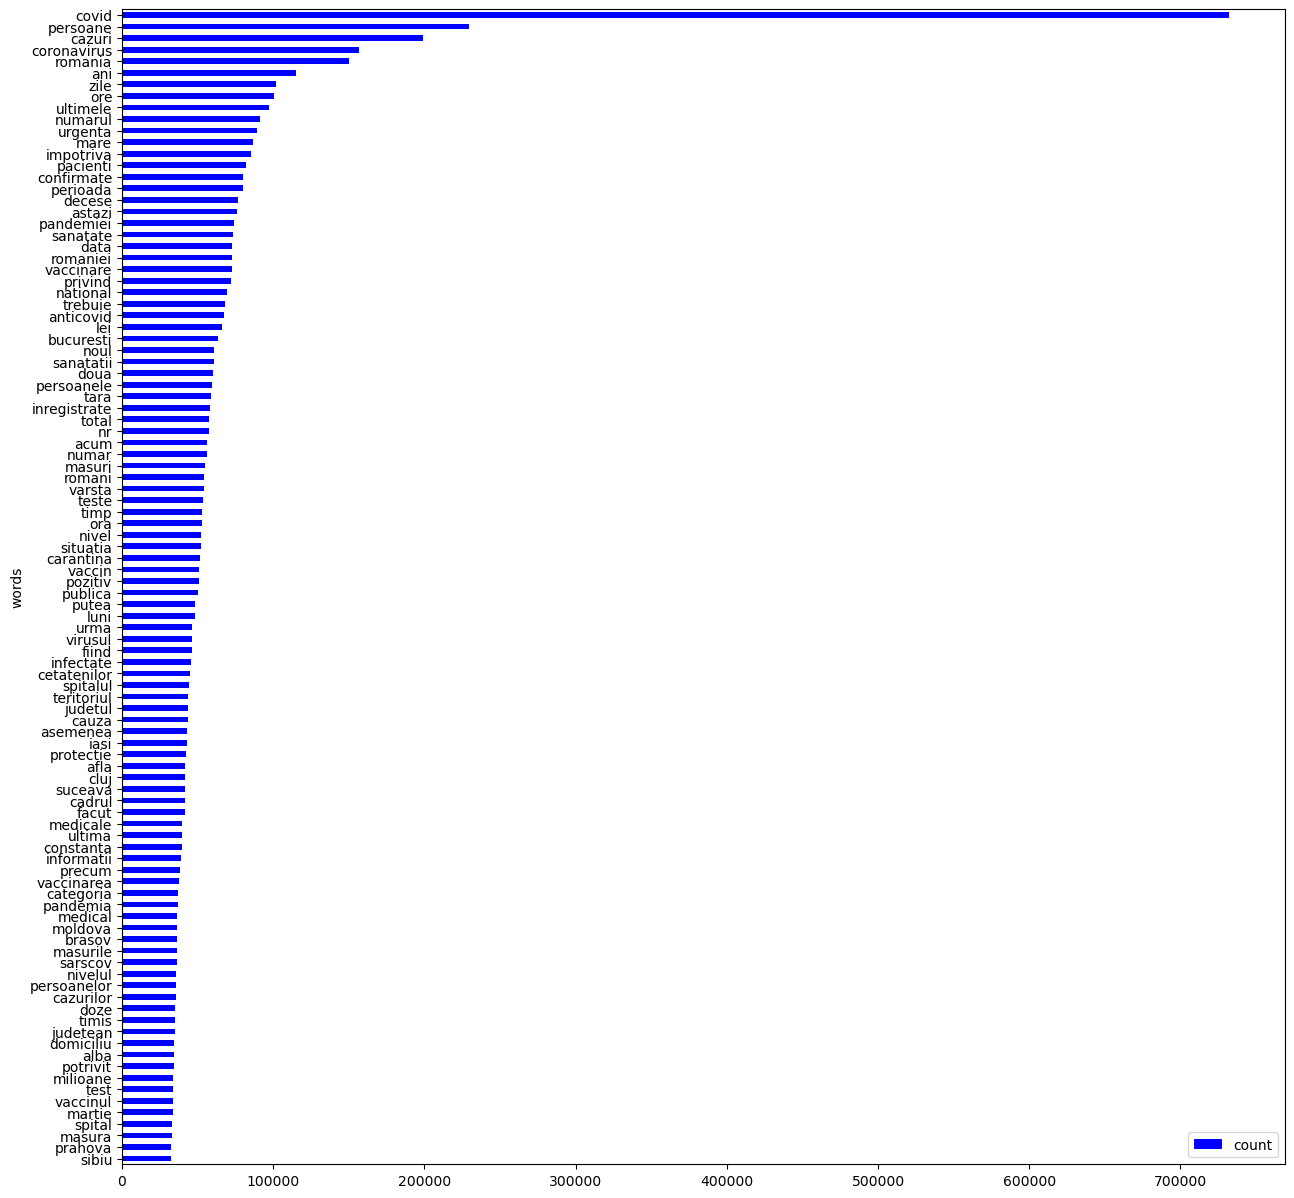

In [29]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot horizontal bar graph
clean_df_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

#ax.set_title("Cele mai comune cuvinte folosite in postari ")

plt.show()

In [30]:
text = clean_df_ncw.iloc[:, 0]
text

0           covid
1        persoane
2          cazuri
3     coronavirus
4         romania
         ...     
95         martie
96         spital
97         masura
98        prahova
99          sibiu
Name: words, Length: 100, dtype: object

# WordCloud

<Figure size 640x480 with 0 Axes>

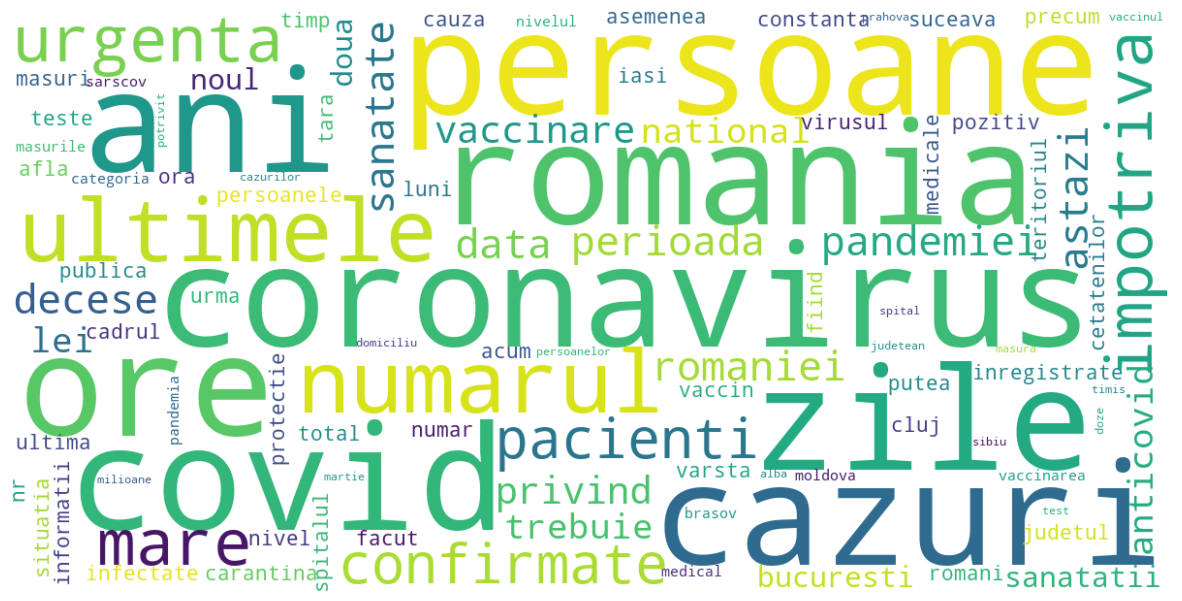

In [32]:
wordcloud = WordCloud( max_font_size=50, max_words=100,scale=3,
                      background_color="white").generate(' '.join(clean_df_ncw['words']))
plt.figure()
plt.figure(figsize=(15,10))
#title="Wordcloud Postari COVID 19 "
#plt.title(title)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file(title+".png")